# **PROJETO CLUSTERING**

**Este projeto utilizado como projeto de estudos para a área de Machine Learning e Data Science com intuito de demonstrar conhecimento sobre os assuntos.**

**Elaborado por EDMUNDO LOPES SILVA**

[LINKEDIN](https://www.linkedin.com/in/edmundo-lopes-silva-7ab3b4163/)


Clustering é uma técnica de aprendizado não supervisionado que visa agrupar dados com base em suas características semelhantes. O objetivo é identificar padrões ou grupos naturais dentro dos dados sem usar rótulos pré-definidos. Existem alguns modelos para elaboração de projetos, mas nesse projeto vamos abordar o K-Means.

K-means: Agrupa dados em um número pré-definido de clusters. Cada ponto é atribuído ao cluster cujo centroide está mais próximo. Os centróides são recalculados até que os grupos se estabilizem.

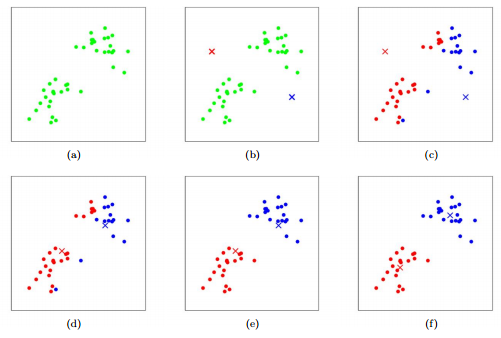



Na imagem acima vemos elementos distribuidos no plano cartesiano. Na ***figura b*** são dispersados 2 pontos aleatórios como centroides de 2 grupos que foram requisitados no algoritmo.

Por sua vez, os cálculos com relação às distâncias dos elementos são elaboradas e novos pontos de centróides são gerados até que o erro tende a zero em relação aos grupos em questão, tal como visto na ***figura f***.

## **1- ANÁLISE DE DADOS**

Os dados foram baixados via [link](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption) em formato zip.

Medições de consumo de energia elétrica em uma casa com uma taxa de amostragem de um minuto ao longo de um período de quase 4 anos. Diferentes grandezas elétricas e alguns valores de submedição estão disponíveis.

**Instâncias: 2.075.259**

**Features: 9**

**Missing Values: YES**


1.date: Data no formato dd/mm/aaaa

2.time: hora no formato hh:mm:ss

3.global_active_power: potência ativa média por minuto global doméstica (em quilowatts)

4.global_reactive_power: potência reativa média por minuto global doméstica (em quilowatts)

5.voltage: voltagem média por minuto (em volts)

6.global_intensity: intensidade de corrente média por minuto global doméstica (em amperes)

7.sub_metering_1: submedição de energia nº 1 (em watt-hora de energia ativa). Corresponde à cozinha, contendo principalmente uma máquina de lavar louça, um forno e um micro-ondas (os fogões não são elétricos, mas movidos a gás).

8.sub_metering_2: submedição de energia nº 2 (em watt-hora de energia ativa). Corresponde à lavanderia, contendo uma máquina de lavar, uma secadora, uma geladeira e uma luz.

9.sub_metering_3: submedição de energia nº 3 (em watt-hora de energia ativa). Corresponde a um aquecedor de água elétrico e a um ar-condicionado.


**VAMOS PARA NOSSO PROJETO!!!**

In [ ]:
# IMPORTAÇÕES DAS BIBLIOTECAS NECESSÁRIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# LEITURA DOS DADOS COM PANDAS

dataset = pd.read_csv("/content/drive/MyDrive/individual+household+electric+power+consumption.zip",
                      delimiter = ";", low_memory = False)

# MOSTRA AS PRIMEIRAAS 5 LINHAS DO ARQUIVO

dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# MOSTRA A ESTRUTURA DA VARIÁVEL: 2075259 LINHAS E 9 COLUNAS NESTE CASO

dataset.shape

(2075259, 9)

In [ ]:
# VERIFICA O TIPO DOS CAMPOS

dataset.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


In [ ]:
# TRAZ AS INFORMAÇÕES DO QUE CONTÉM NA VARIÁVEL DE FORMA COMPLETA

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
# MOSTRA O DATAFRAME COM AS INFORMAÇÕES INDIVIDUAIS SOBRE OS VALORES MISSING, MUITO RUIM DE VISUALIZAR

# dataset.isnull()

#  MOSTRA SE É TRUE OU FALSE A EXISTENCIA DE DADOS MISSING

dataset.isnull().values.any()

True

In [ ]:
# CHECANDO OS VALORES MISSING E ONDE ESTÃO

dataset.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


## **2- PRÉ PROCESSAMENTO DOS DADOS**

In [ ]:
dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [ ]:
# UTILIZAMOS .iloc PARA SELECIONAR LINHAS E COLUNAS QUE QUEREMOS EM NOSSO NOVO DATAFRAME
# RETIRAMOS A COLUNA REFERENTE A 0 (DATA) E 1 (HORA)
# UTILIZAMOS O .dropna PARA RETIRAR OS VALORES MISSING QUE TEMOS EM NOSSO DATAFRAME

dataset_clear = dataset.iloc[0:, 2:9].dropna()
dataset_clear.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [ ]:
# FAREMOS A VERIFICAÇÃO NOVAMENTE SE HÁ VALORES MISSING

dataset_clear.isnull().values.any()

False

In [ ]:
# AQUI VEMOS QUE NÃO TEMOS MAIS VALORES MISSING NESSA ETAPA DO PROJETO

dataset_clear.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [ ]:
# AQUI ADICIONAMOS NA VARIAVEL dataset_atrib OS VALORES DOS DATASET EM FORMATO ARRAY COM A FUNÇÃO .values

dataset_atrib = dataset_clear.values
dataset_atrib

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.938', '0.000', '239.820', ..., '0.000', '0.000', 0.0],
       ['0.934', '0.000', '239.700', ..., '0.000', '0.000', 0.0],
       ['0.932', '0.000', '239.550', ..., '0.000', '0.000', 0.0]],
      dtype=object)

In [ ]:
# VEMOS O TAMAHO DO NOSSO DATAFRAME APÓS A RETIRADA DOS VALORES MISSING

dataset_atrib.shape

(2049280, 7)

In [ ]:
# VAMOS FAZER UM SPLIT AQUI PARA SEPARAR APENAS UMA PARCELA DOS DADOS
# ASSIM NÃO IRÁ CONSUMIR MUITO DE NOSSA MÁQUINA COM UM SPLIT DE 1% DOS DADOS

dataset, amostra2 = train_test_split(dataset_atrib, train_size=0.01)
dataset.shape

(20492, 7)

## **3- REDUÇÃO DE DIMENSIONALIDADE - PCA**

A redução de dimensionalidade com PCA (Principal Component Analysis, ou Análise de Componentes Principais) é uma técnica estatística utilizada para simplificar conjuntos de dados ao reduzir o número de variáveis (ou dimensões) enquanto retém a maior parte da variabilidade ou informação presente nesses dados.

O PCA visa transformar um conjunto de dados de alta dimensionalidade em um conjunto de dados com menos dimensões (componentes principais), preservando ao máximo a variação presente nos dados originais.

O primeiro passo é normalizar os dados, depois devemos calcular a matriz de covariância entre todas as variáveis do conjunto de dados. Essa matriz mostra a correlação entre as variáveis. A ideia é entender como as variáveis variam em relação umas às outras.

**COVARIÂNCIA:**


A covariância mede a variação conjunta de duas variáveis em relação às suas médias. Se temos duas variáveis
𝑋
 e
𝑌
:

- Se as variáveis aumentam ou diminuem juntas (movem-se na mesma direção), a covariância será positiva.

- Se uma variável aumenta enquanto a outra diminui (movem-se em direções opostas), a covariância será negativa.

- Se não houver uma relação clara entre as variáveis, a covariância será próxima de zero.

Caso queira relembrar o que é a matriz de covariância, acesse o seguinte link: [Vídeo para entendimento](https://www.youtube.com/watch?v=uFAILLxdajk)

In [ ]:
dataset

array([['0.742', '0.170', '243.560', ..., '0.000', '1.000', 1.0],
       ['1.866', '0.210', '235.440', ..., '0.000', '0.000', 17.0],
       ['0.294', '0.092', '241.440', ..., '0.000', '0.000', 1.0],
       ...,
       ['0.244', '0.000', '245.560', ..., '0.000', '0.000', 0.0],
       ['0.356', '0.178', '245.550', ..., '0.000', '1.000', 0.0],
       ['0.246', '0.158', '241.130', ..., '0.000', '1.000', 0.0]],
      dtype=object)

In [ ]:
'''
  AQUI FAZEMOS A MANIPULAÇÃO DOS DADOS COM UMA REDUÇÃO DE DIMENSIONALIDADE COM
  UTILIZANDO O MÉTODO DENOMINADO PCA (PRINCIPAL COMPONENT ANALYSIS)

'''

pca = PCA(n_components = 2).fit_transform(dataset)
pca

array([[-6.13433469,  0.7512225 ],
       [10.53334948, -4.61338114],
       [-6.78069249,  0.01840126],
       ...,
       [-8.27881222,  0.03521459],
       [-7.85622159,  0.63088677],
       [-7.42462283,  0.9148881 ]])

In [ ]:
k_range = range(1,12)
k_range

range(1, 12)

In [ ]:
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]
k_means_var

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11)]

In [ ]:
# FAZEMOS O CALCULO DOS CENTROIDES DE ACORDO COM O RANGE QUE FIZEMOS ENTRE 1 E 11 GRUPOS

centroids = [X.cluster_centers_ for X in k_means_var]

print(f'CENTROIDS: {centroids}')

CENTROIDS: [array([[-1.27194327e-13, -8.31883524e-14]]), array([[-6.46690935,  1.35651053],
       [11.80161924, -2.47552886]]), array([[-6.74168608,  0.83681136],
       [10.67702093, -5.03468663],
       [17.80508821, 24.23091401]]), array([[-6.77216767,  0.78358303],
       [10.66296241, -5.06337342],
       [23.77433867, 21.91372522],
       [ 6.23868983, 26.05173978]]), array([[-6.77917542,  0.77153434],
       [10.58541409, -5.20712635],
       [25.40470586, 28.77418894],
       [ 5.43416009, 24.50858799],
       [19.32796726, 10.89613486]]), array([[-6.80498981,  0.72908434],
       [10.58541409, -5.20712635],
       [25.87484105, 27.70875598],
       [ 8.8335988 , 33.21900389],
       [19.39027167, 10.85053981],
       [ 2.18431285, 15.98838171]]), array([[10.9517256 , -5.31546072],
       [-6.83737013,  0.73989748],
       [25.87484105, 27.70875598],
       [ 8.8335988 , 33.21900389],
       [ 2.18431285, 15.98838171],
       [19.40394037, 10.87572344],
       [ 3.48931023, -3

CENTROIDS: [array([[-1.27194327e-13, -8.31883524e-14]]), array([[-6.46690935,  1.35651053],
       [11.80161924, -2.47552886]]), array([[-6.74168608,  0.83681136],
       [10.67702093, -5.03468663],
       [17.80508821, 24.23091401]]), array([[-6.77216767,  0.78358303],
       [10.66296241, -5.06337342],
       [23.77433867, 21.91372522],
       [ 6.23868983, 26.05173978]]), array([[-6.77917542,  0.77153434],
       [10.58541409, -5.20712635],
       [25.40470586, 28.77418894],
       [ 5.43416009, 24.50858799],
       [19.32796726, 10.89613486]]), array([[-6.80498981,  0.72908434],
       [10.58541409, -5.20712635],
       [25.87484105, 27.70875598],
       [ 8.8335988 , 33.21900389],
       [19.39027167, 10.85053981],
       [ 2.18431285, 15.98838171]]), array([[10.9517256 , -5.31546072],
       [-6.83737013,  0.73989748],
       [25.87484105, 27.70875598],
       [ 8.8335988 , 33.21900389],
       [ 2.18431285, 15.98838171],
       [19.40394037, 10.87572344],
       [ 3.48931023, -3

Text(0.5, 1.0, 'Variancia Explicada para cada valor de K')

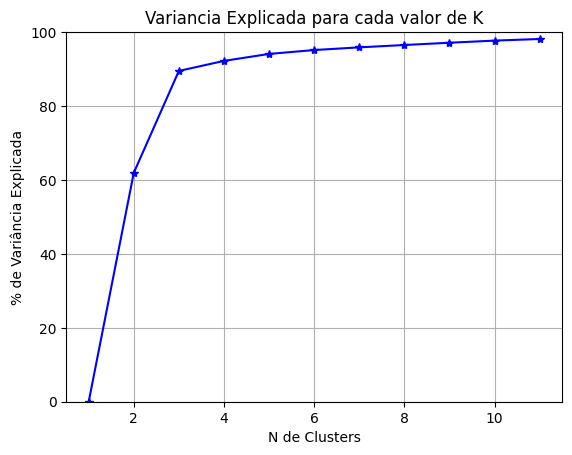

In [ ]:
# AJUSTANDO O CENTROIDE DO CLUSTER PARA CADA CENTROIDE

centroids = [X.cluster_centers_ for X in k_means_var]

# print(f'CENTROIDS: {centroids}')

# CALCULA A DISTANCIA EUCLIDIANA DE CADA PONTO PARA O CENTROIDE

k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]

dist = [np.min(ke, axis = 1) for ke in k_euclid]

#  SOMA DOS QUADRADOS DAS DISTANCIAS DENTRO DO CLUSTER

soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

# print(f'SOMA_QUADRADOS_INTRA_CLUSTER: {soma_quadrados_intra_cluster}')

# SOMA TOTAL DOS QUADRADOS

soma_total = sum(pdist(pca)**2)/pca.shape[0]

# print(f'SOMA_TOTAL: {soma_total}')

# SOMA DOS QUADRADOS ENTRE CLUSTERS
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

# CURVA DE ELBOW

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('N de Clusters')
plt.ylabel('% de Variância Explicada')
plt.title('Variancia Explicada para cada valor de K')

In [ ]:
# ESCOLHEMOS UM VALOR QUE ESTEJA MAIS PRÓXIMO DO PLATOR SOBRE AS INFORMAÇÕES, NESTE CASO 4

modelo_v1 = KMeans(n_clusters=8)
modelo_v1.fit(pca)

KMeans()

**SILHOUETTE SCORE**

O Silhouette Score é uma métrica usada para avaliar a qualidade de um algoritmo de clustering. Ele mede o quão bem os dados foram agrupados, ou seja, quão próximos os pontos estão do centro de seus próprios clusters em comparação com outros clusters. O score varia de -1 a 1, onde:

- +1 indica que os pontos estão bem agrupados no cluster correto e distantes dos outros clusters.
- 0 indica que os pontos estão na fronteira entre dois clusters, ou seja, não está claro a qual cluster pertencem.
- -1 indica que os pontos podem estar no cluster errado.

In [ ]:
# CRIAMOS UM LAÇO SOBRE OS VALORES

score = []

for i in range(2,13):
  modelo = KMeans(n_clusters=i)
  modelo.fit(pca)

  label = modelo.labels_

  result = silhouette_score(pca, label, metric = 'euclidean')

  score.append(result*100)

  print(f'Modelo com n_clusters = {i} grupos: {result}')

Modelo com n_clusters = 2: 0.7874133336244504
Modelo com n_clusters = 3: 0.8536043894956377
Modelo com n_clusters = 4: 0.8570895684052571
Modelo com n_clusters = 5: 0.8585902144637423
Modelo com n_clusters = 6: 0.8607134110442375
Modelo com n_clusters = 7: 0.7688321315621942
Modelo com n_clusters = 8: 0.8032923602323655
Modelo com n_clusters = 9: 0.7689535438680271
Modelo com n_clusters = 10: 0.6303760518803906
Modelo com n_clusters = 11: 0.6257301677087439
Modelo com n_clusters = 12: 0.6178907092635478


Text(0, 0.5, '% Silhouette Score')

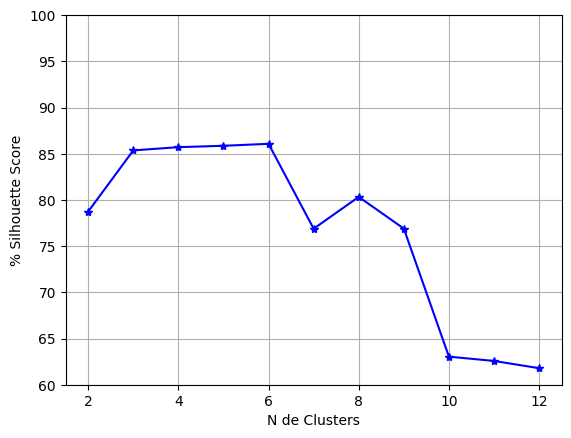

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(2,13), score, 'b*-')
ax.set_ylim((60,100))
plt.grid(True)
plt.xlabel('N de Clusters')
plt.ylabel('% Silhouette Score')

In [ ]:
modelo = KMeans(n_clusters=4)
modelo.fit(pca)

KMeans(n_clusters=4)

In [ ]:
x_min, x_max = pca[:, 0].min() -5, pca[:, 0].max() -1
y_min, y_max = pca[:, 1].min() +1, pca[:, 1].max() +5

xx, yy = np.meshgrid(np.arange(x_min,x_max, .02), np.arange(y_min,y_max, .02))

z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

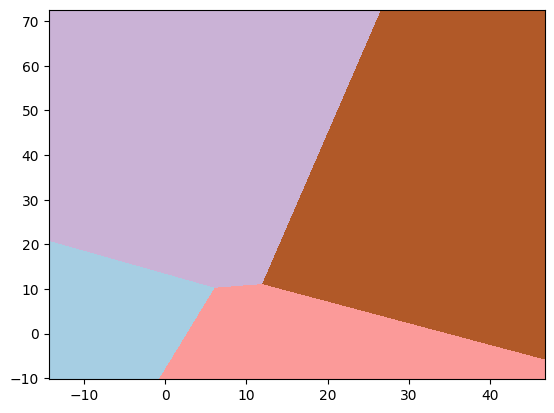

In [ ]:
plt.figure(1)
plt.clf()
plt.imshow(z,
           interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired, aspect = 'auto', origin = 'lower')



In [ ]:
names = ['Global_active_power',	'Global_reactive_power',
         'Voltage',	'Global_intensity',	'Sub_metering_1',
         'Sub_metering_2',	'Sub_metering_3']


cluster_map = pd.DataFrame(dataset, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo.labels_

In [ ]:
cluster_map

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,0.742,0.170,243.560,3.000,0.000,1.000,1.0,0
1,1.866,0.210,235.440,8.000,0.000,0.000,17.0,1
2,0.294,0.092,241.440,1.200,0.000,0.000,1.0,0
3,0.302,0.112,243.330,1.200,0.000,0.000,0.0,0
4,0.214,0.000,242.260,1.000,0.000,0.000,1.0,0
...,...,...,...,...,...,...,...,...
20487,0.318,0.092,239.730,1.400,0.000,0.000,1.0,0
20488,2.942,0.132,239.220,12.200,0.000,0.000,18.0,1
20489,0.244,0.000,245.560,1.000,0.000,0.000,0.0,0
20490,0.356,0.178,245.550,1.600,0.000,1.000,0.0,0


In [ ]:
cluster_map.groupby('cluster')['Global_active_power'].mean()

,Global_active_power
cluster,
0,0.517862
1,1.822193
2,3.239073
3,4.382557
